In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
import torch.nn as nn # nn - nearual networks

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
t1 = torch.tensor(
    [[1, 2],
    [3, 4]],
    dtype=torch.float32
    ).to(device)

print(t1.shape, t1.size)

torch.Size([2, 2]) <built-in method size of Tensor object at 0x7f8f97bb1410>


In [ ]:
t2 = torch.randint(0, 10, (2, 2), dtype=torch.float32).to(device)
print(t2)

tensor([[5., 8.],
        [0., 6.]], device='cuda:0')


In [ ]:
t3 = torch.from_numpy(np.array([1, 2, 3])).to(device)
print(t3)

tensor([1, 2, 3], device='cuda:0')


In [ ]:
t1 + t2

tensor([[ 6., 10.],
        [ 3., 10.]], device='cuda:0')

In [ ]:
t1 * t2

tensor([[ 5., 16.],
        [ 0., 24.]], device='cuda:0')

In [ ]:
t1 @ t2

tensor([[ 5., 20.],
        [15., 48.]], device='cuda:0')

In [ ]:
t4 = torch.randint(0, 10, (5, 6), dtype=torch.float32).to(device)
print(t4)
print(t4[3:6])

tensor([[3., 5., 7., 5., 4., 5.],
        [8., 1., 7., 8., 6., 8.],
        [8., 7., 9., 0., 8., 5.],
        [8., 3., 2., 3., 6., 1.],
        [6., 9., 6., 2., 7., 5.]], device='cuda:0')
tensor([[8., 3., 2., 3., 6., 1.],
        [6., 9., 6., 2., 7., 5.]], device='cuda:0')



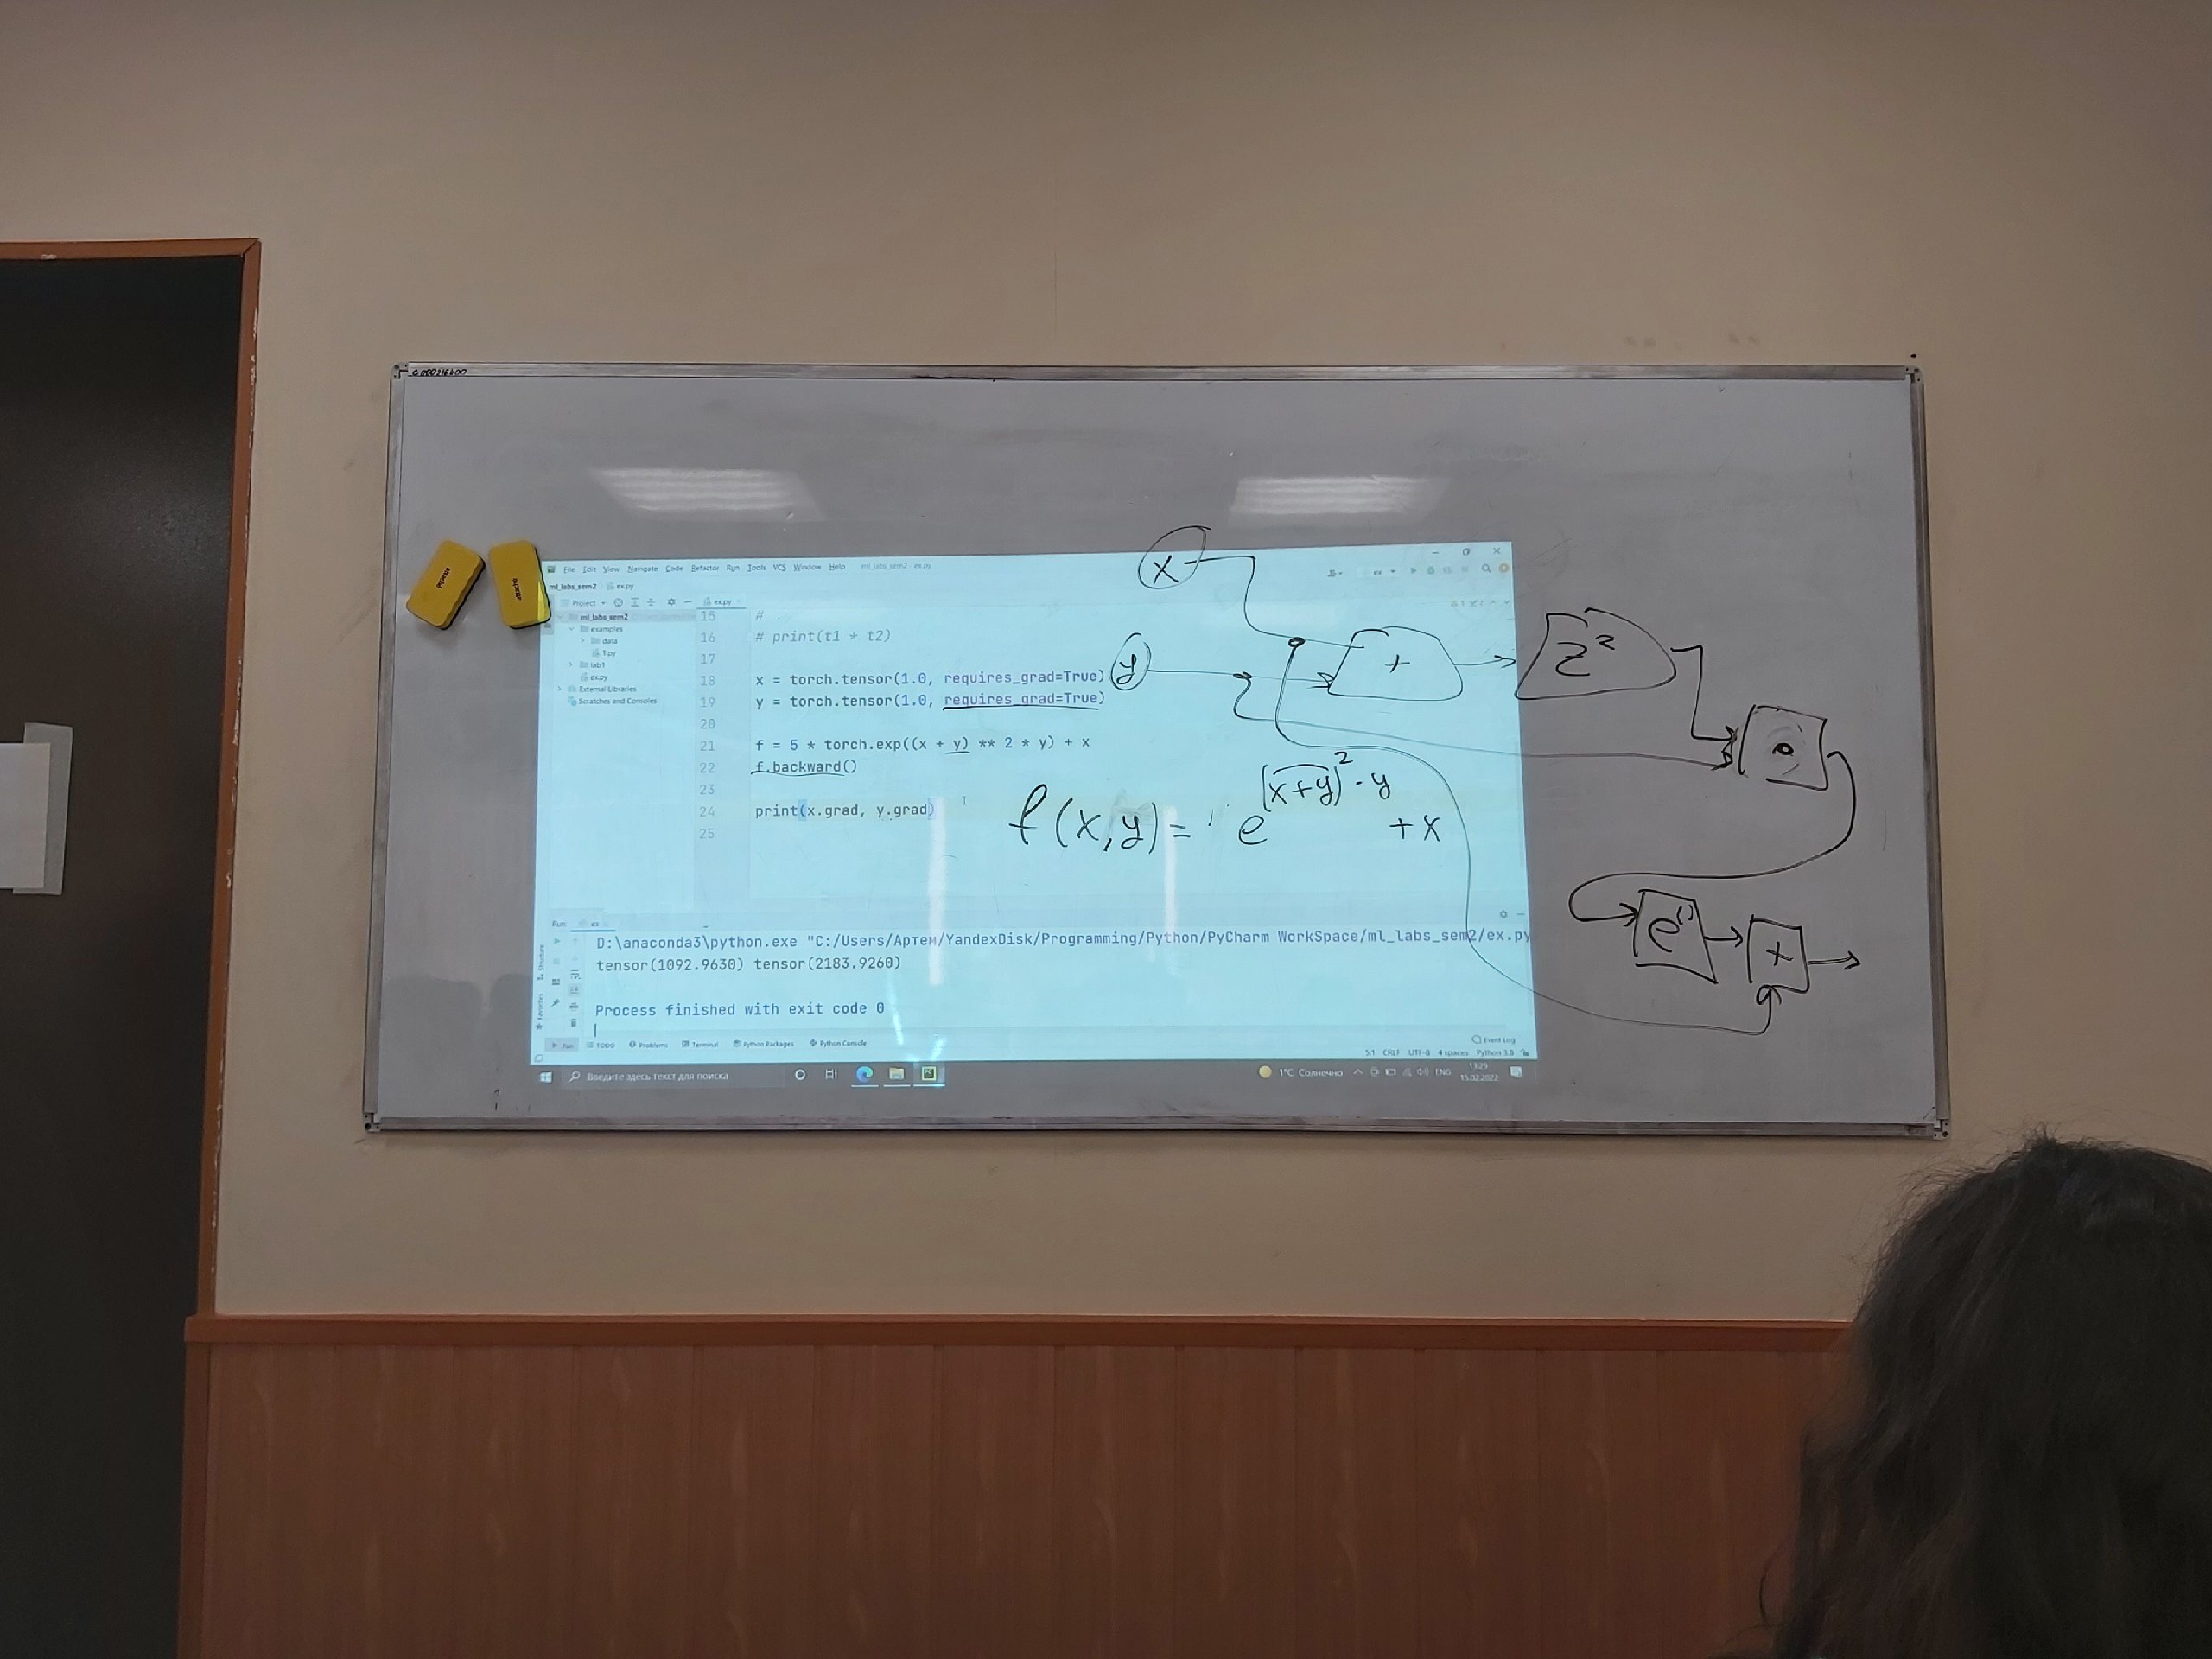

In [ ]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
f = 5 * torch.exp((x + y) ** 2 * y) + x
f.backward()
print(x.grad, y.grad) # частные производные f по x и y в указанных точках


tensor(3.9396e+09) tensor(6.8943e+09)


In [26]:
# линейная регрессия в терминах нейросети

class LinearReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(in_features=1, out_features=1) #1 нейрон на входе, 1 на выходе, 1 всего

  def forward(self, x):
    return self.l1(x) 

In [23]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append(row)
            y.append(label)
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
X, y = load_data()

In [27]:
model = LinearReg()

In [ ]:
loss_function = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [29]:
for i in range(500):
  optimizer.zero_grad()
  loss = loss_function(model(X), y)
  loss.backward()
  optimizer.step()

NameError: ignored